In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gp
import collections
import csv

# Data Set Overview and Metric

For my dataset, I decided to evaluate the number of playing fields and number of playgrounds as one. 

In terms of our overall metric of raising a family, playing fields and playgrounds are both very nice features to have for kids. I chose to do both because some families might use playing fields more and some may use playgrounds more so it felt unfair to only analyze one. They both serve different purposes, but contribute to childhood recreation. The data set that will be considered the "best" from my data set is the one with the most play areas. The sum of the number of playgrounds and number of playing fields. The data sets that I am using are both from WPRDC and contain data from 2017 to present day. 

In [53]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")

In [62]:

play_areas = collections.Counter()
with open('fields.csv') as data:
    for x in csv.reader(data):
        play_areas[x[11]] += 1
        
with open('playgrounds.csv') as data:
    for x in csv.reader(data):
        play_areas[x[7]] += 1

playareas_df = pd.DataFrame.from_records(list(dict(play_areas).items()), columns=['Neighborhood','Total'])

playareas_total = playareas_df.groupby('Neighborhood').sum()['Total']


,Neighborhood,Total
19,Squirrel Hill South,13
1,South Side Slopes,11
6,Brighton Heights,9
44,Carrick,8
12,Brookline,8
27,Beechview,8
18,Highland Park,8
39,Sheraden,7
33,Beltzhoover,7
7,Hazelwood,7


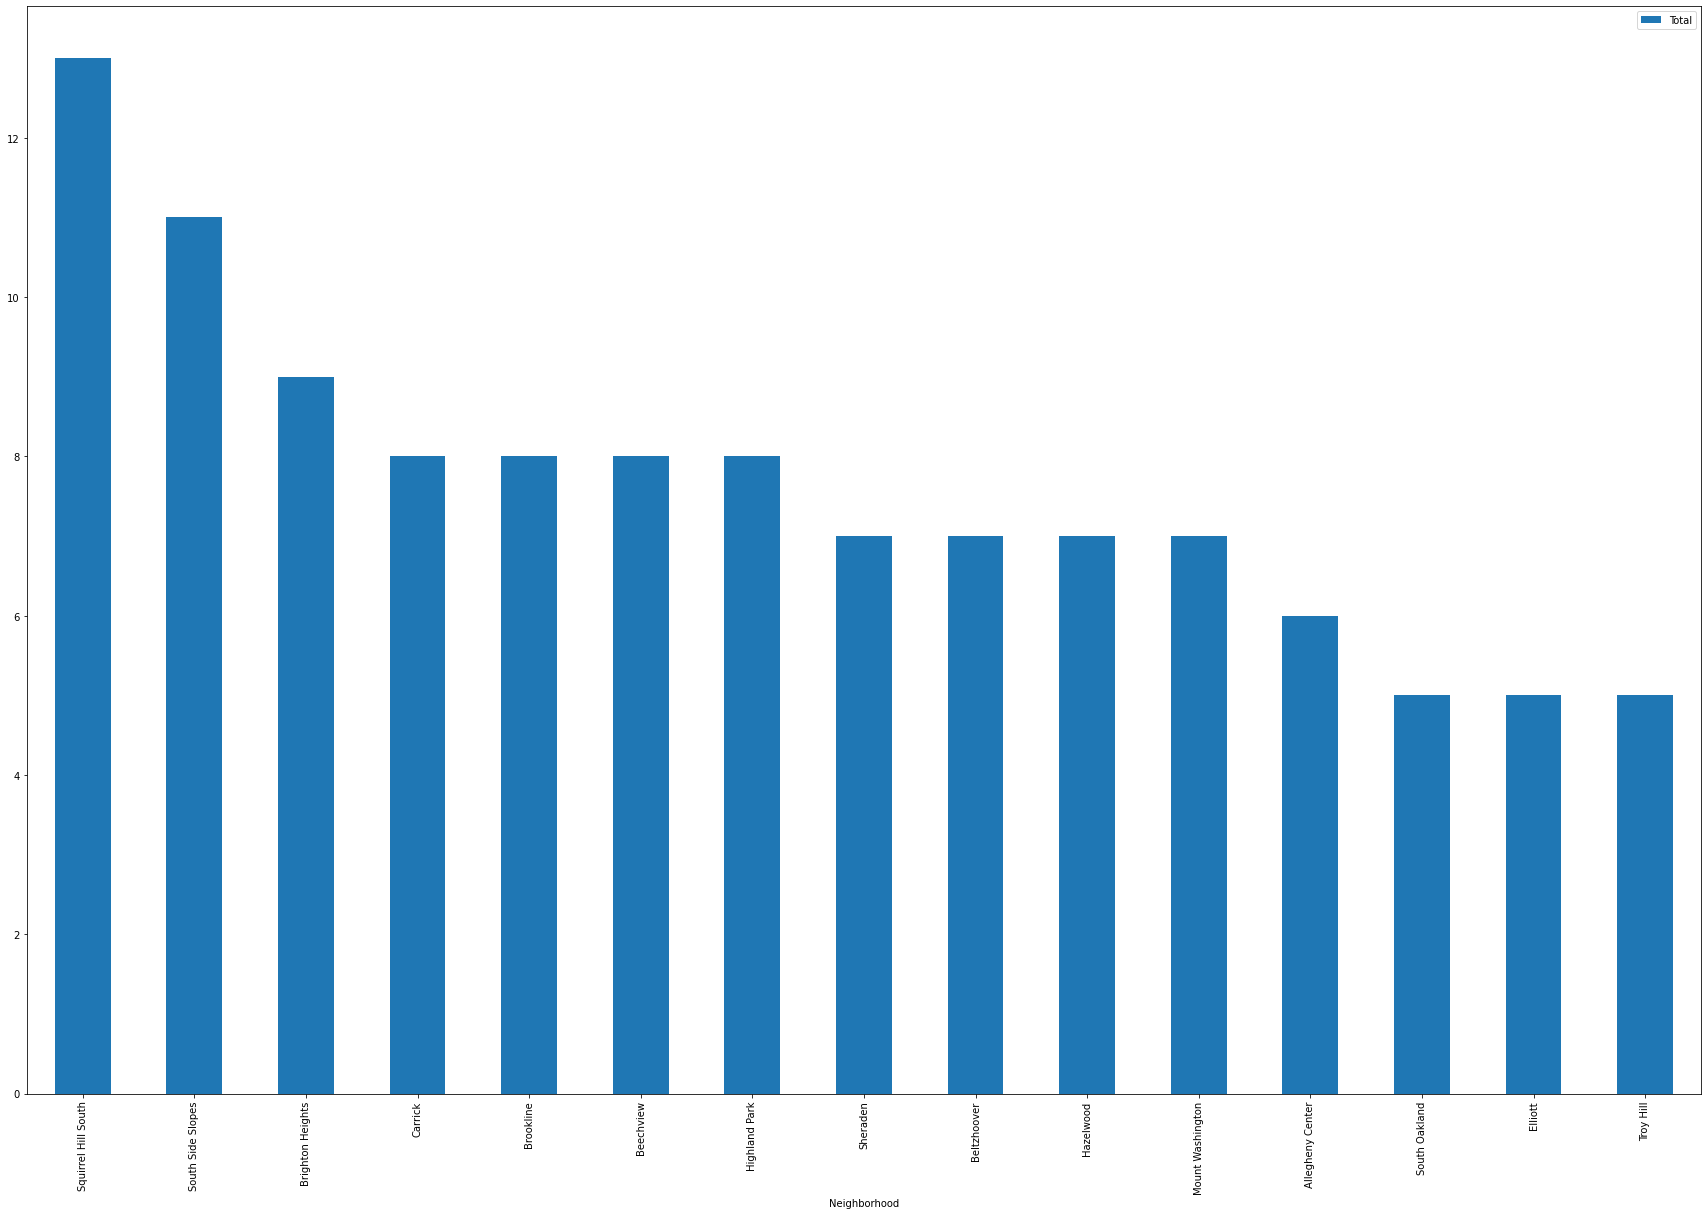

In [63]:
highestvalues = playareas_df.sort_values("Total", ascending = False).head(15)
highestvalues.plot(kind = 'bar', x = "Neighborhood", y = "Total", figsize=(30,20))
highestvalues

# Interpreting the Bar Graph
After creating a new dataframe with the neighborhoods and their corresponding total number of play areas, I created a bar graph of the top 15 neighborhoods. From the bar graph, you can clearly see that Squirrel Hill has the most with 13 and Brookline has the 5th most with 8 playareas.

The top 5 are as follows:
1. Squirrel Hill South
2. South Side Slopes
3. Brighton Heights
4. Carrick
5. Brookline

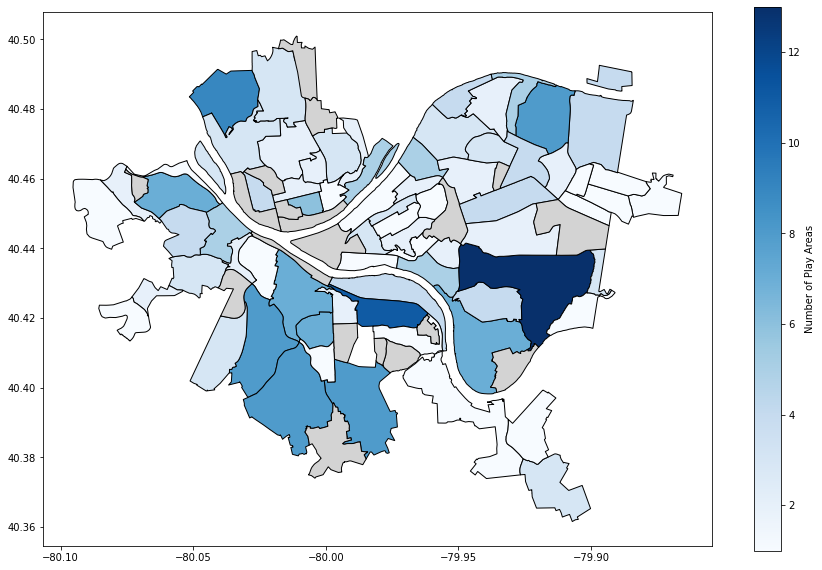

In [64]:
fields_map = neighborhoods.merge(fields_total, how='left', left_on='hood', right_on='Neighborhood')

fields_map.plot(column = "Total",
               cmap='Blues',          
               edgecolor="black",       
               legend=True,            
               legend_kwds={'label': "Number of Play Areas"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"}
               )

# Analyzing the Graph
As you can see on the map, the data is overall very spread out and there doesn't seem to be any major patterns or clusters. Squirrel hill clearly contains the most play areas as it the darkest blue and there is a small cluster of neighborhoods with a large amount around South Side Slopes and Carrick. The grey areas represent neighborhoods that did not have a corresponding value for play areas

# Conclusion
The neighborhood in Pittsburgh that should be deemed the best to raise a family based on my metric should have the most number of play areas. Based on this, Squirrel Hill South is the best neighborhood with 13 play areas followed by Southside Slopes and Brighton Heights.